<a href="https://colab.research.google.com/github/LeyliG/Independent-Learning/blob/master/Mini_DS_Bootcamp_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MINI DATA SCIENCE BOOTCAMP (2/3)
## Part 2/3 - Cleaning, Statistics and Visualization

### Titanic Data:
1. Download the Titanic datasets from Kaggle (https://www.kaggle.com/c/titanic/data). We are going to focus on train.csv this session.
2. Create a specific folder in your Google Drive for this data and upload train.csv to that location

#### **Dataset**

In [0]:
#We need to load titanic dataset from Google Drive into a pandas data frame
#To get files from Google drive to Colab, mount the Google drive to Colab session
from google.colab import drive

#this will prompt for authorization
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls '/content/drive/My Drive/WWCode-Data Science/Mini Data Science Boot camp/data/titanic'

gender_submission.csv  test.csv  train.csv


In [0]:
train_drive = '/content/drive/My Drive/WWCode-Data Science/Mini Data Science Boot camp/data/titanic/train.csv'


###### Titanic Dataset

We will be using numpy and pandas for data preprocessing and Seaborn and Matplotlib for Visualization.

In [0]:
#import all other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#Locate the file in the left tab under 'Files' (refresh if needed), and right click - copy path on it. Paste it in the file name section below.
df = pd.read_csv(train_drive)
print("(rows,columns)")
df.shape

(rows,columns)


(891, 12)

In [0]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativeCount,TravelAlone,AgeBucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,G6,S,1,No,15-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,No,30-45
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S,0,Yes,15-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,No,30-45
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,G6,S,0,Yes,30-45
5,6,0,3,"Moran, Mr. James",male,29.642093,0,0,330877,8.4583,G6,Q,0,Yes,15-30
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0,Yes,45-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,G6,S,4,No,<15
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,G6,S,2,No,15-30
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C,1,No,<15


In [0]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativeCount,TravelAlone,AgeBucket
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,G6,S,0,Yes,15-30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S,0,Yes,15-30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.45,G6,S,3,No,15-30
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C,0,Yes,15-30
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,G6,Q,0,Yes,30-45


#### Summary of Column Values
Survived: Survived (1) or died (0)

Pclass: Passenger’s class

Name: Passenger’s name

Sex: Passenger’s sex

Age: Passenger’s age

SibSp: Number of siblings/spouses aboard

Parch: Number of parents/children aboard

Ticket: Ticket number

Fare: Fare

Cabin: Cabin

Embarked: Port of embarkation

#### Handling Null Values

There are 3 ways to handle null values


1.   Remove NaN rows
2.   Set NaN to hard coded value
3.   Impute NaN values based on other rows




.any() - The any() method returns True if any element of an iterable is True. If not, any() returns False.

In [0]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'RelativeCount',
       'TravelAlone', 'AgeBucket'],
      dtype='object')

In [0]:
#Find columns with Nans in them
print("Columns with missing values: ")
print(df.columns[df.isnull().any()].tolist())

Columns with missing values: 
['Age', 'Cabin', 'Embarked']


In [0]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [0]:
#Get counts of Nan values
print("Missing Value Count - " + str(len(df)) + " rows")
print("Age: " + str(df['Age'].isna().sum()))
print("Cabin: " + str(df['Cabin'].isna().sum()))
print("Embarked: " + str(df['Embarked'].isna().sum()))

Missing Value Count - 891 rows
Age: 177
Cabin: 687
Embarked: 2


**Since Embarked has only 2 NaN rows, let us drop the rows with the missing values**

In [0]:
data_frame = df.dropna()

In [0]:
data_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
RelativeCount    0
TravelAlone      0
AgeBucket        0
dtype: int64

In [0]:
data_frame.shape

(889, 15)

In [0]:
#Drop NA's - lets drop rows where Embarked is null
print("Before dropping - " + str(len(df)) + " rows")
df = df[~df['Embarked'].isna()]
print("After dropping - " + str(len(df)) + " rows")

Before dropping - 891 rows
After dropping - 889 rows


**Since Cabin has a lot of empty values, let us impute its value by filling it with the most frequent Cabin**

value_counts(): Pandas Index.value_counts() function returns object containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. https://www.geeksforgeeks.org/python-pandas-index-value_counts/

idxmax(): Return index of first occurrence of maximum over requested axis.

In [0]:
df['Cabin'].value_counts()

G6             691
C23 C25 C27      4
B96 B98          4
E101             3
F2               3
              ... 
A34              1
C104             1
B69              1
B3               1
A23              1
Name: Cabin, Length: 146, dtype: int64

In [0]:
#Fill NA's - Since Cabin is mostly empty, lets fill it with the most frequent value
most_frequent_cabin = df['Cabin'].value_counts().idxmax()
print("Most Frequent Cabin = " + most_frequent_cabin)
print("NA count before fill = " + str(len(df[df['Cabin'].isna()])))
df['Cabin'] = df['Cabin'].fillna(most_frequent_cabin)
print("NA count after fill = " + str(len(df[df['Cabin'].isna()])))

Most Frequent Cabin = G6
NA count before fill = 687
NA count after fill = 0


**Since Age is numerical, let us impute its value by filling it with the mean age of passengers on the ship.**

fillna(): DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs). https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/

In [0]:
#Impute NA - Since age is numerical, lets fill the NA values with the mean age of the dataset
mean_age = df['Age'].mean()
print("Mean age of passengers = " + str(mean_age))
print("NA count before fill = " + str(len(df[df['Age'].isna()])))
df['Age'] = df['Age'].fillna(mean_age)
print("NA count after fill = " + str(len(df[df['Age'].isna()])))

Mean age of passengers = 29.64209269662921
NA count before fill = 177
NA count after fill = 0


#### Descriptive Statistics

What is Descriptive Statistics?

Descriptive statistics are brief descriptive coefficients that summarize a given data set, which can be either a representation of the entire or a sample of a population.

Descriptive statistics are broken down into measures of central tendency and measures of variability (spread). Measures of central tendency include the mean, median, and mode, while measures of variability include the standard deviation, variance, the minimum and maximum variables, and the kurtosis and skewness.

**Let us find out the datatypes of the data and infer whether is numerical or categorical in nature**

Note: Always make sure to check the types of the labels. You can change type using .astype() - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


**All the columns are numerical in nature. The int64 columns are indicative that it might be a categorical column. To be sure, let us get an idea on the number of unique values in each column to know which columns are nominal/categorical in nature and which columns are numerical in nature.**

When working with statistics, it’s important to recognize the different types of data: numerical (discrete and continuous), categorical, and ordinal.

Most data fall into one of two groups: numerical or categorical.

Numerical data can be further broken into two types: discrete and continuous.

https://www.dummies.com/education/math/statistics/types-of-statistical-data-numerical-categorical-and-ordinal/.
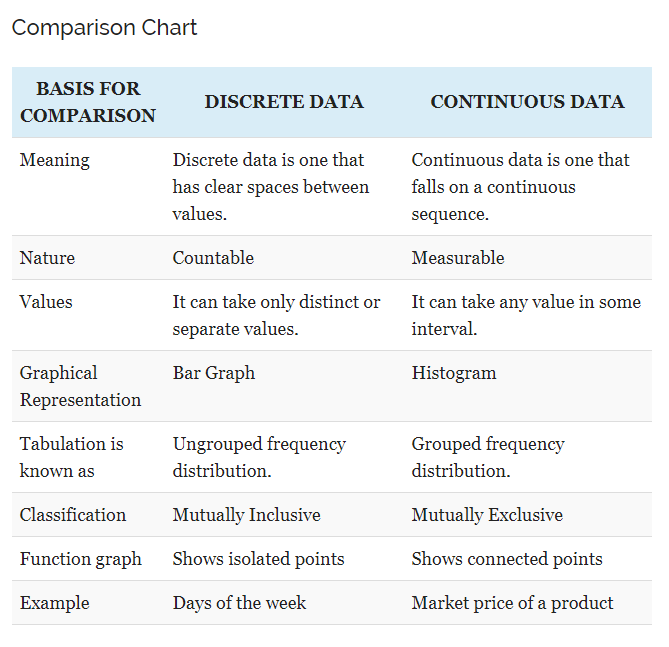

Note: Understanding COntinuous and discreet data is very important when going further into Machine Learning in choosing different models and algorithms.

In [0]:
print("Unique Value Count:")
cols = df.columns.tolist()
for col in cols:
  print(col + " = " + str(len(df[col].unique())))

Unique Value Count:
PassengerId = 889
Survived = 2
Pclass = 3
Name = 889
Sex = 2
Age = 89
SibSp = 7
Parch = 7
Ticket = 680
Fare = 247
Cabin = 146
Embarked = 3


**Get those sweet summary stats on each column to understand the distribution better**

In [0]:
#statistical distribution
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**To get a more visual representation of the numbers above, you can use Pandas hist to get the histogram of all the columns.**

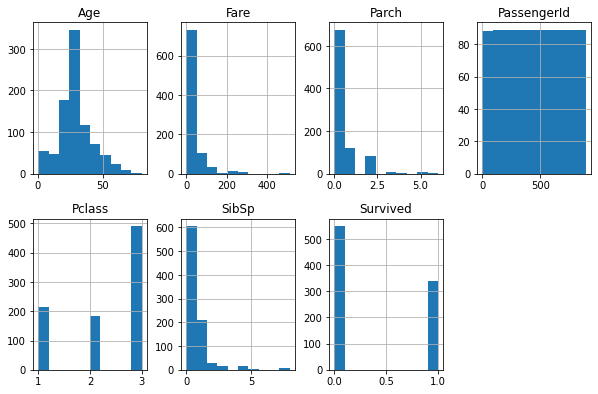

In [0]:
hist = df.hist(figsize=(10,10),layout=(3,4))

**From these, we can confirm that the following are categorical/nominal columns:**


1.   Pclass (3 values)
2.   Survived (2 values)
3.   Embarked (3 values)
4.   Sex (2 values)

**Another way to visualize all relationships in your data, is to use the pairplot from seaborn**

Seaborn pairplot(): to plot pairwise relationships in a dataset.
https://seaborn.pydata.org/generated/seaborn.pairplot.html

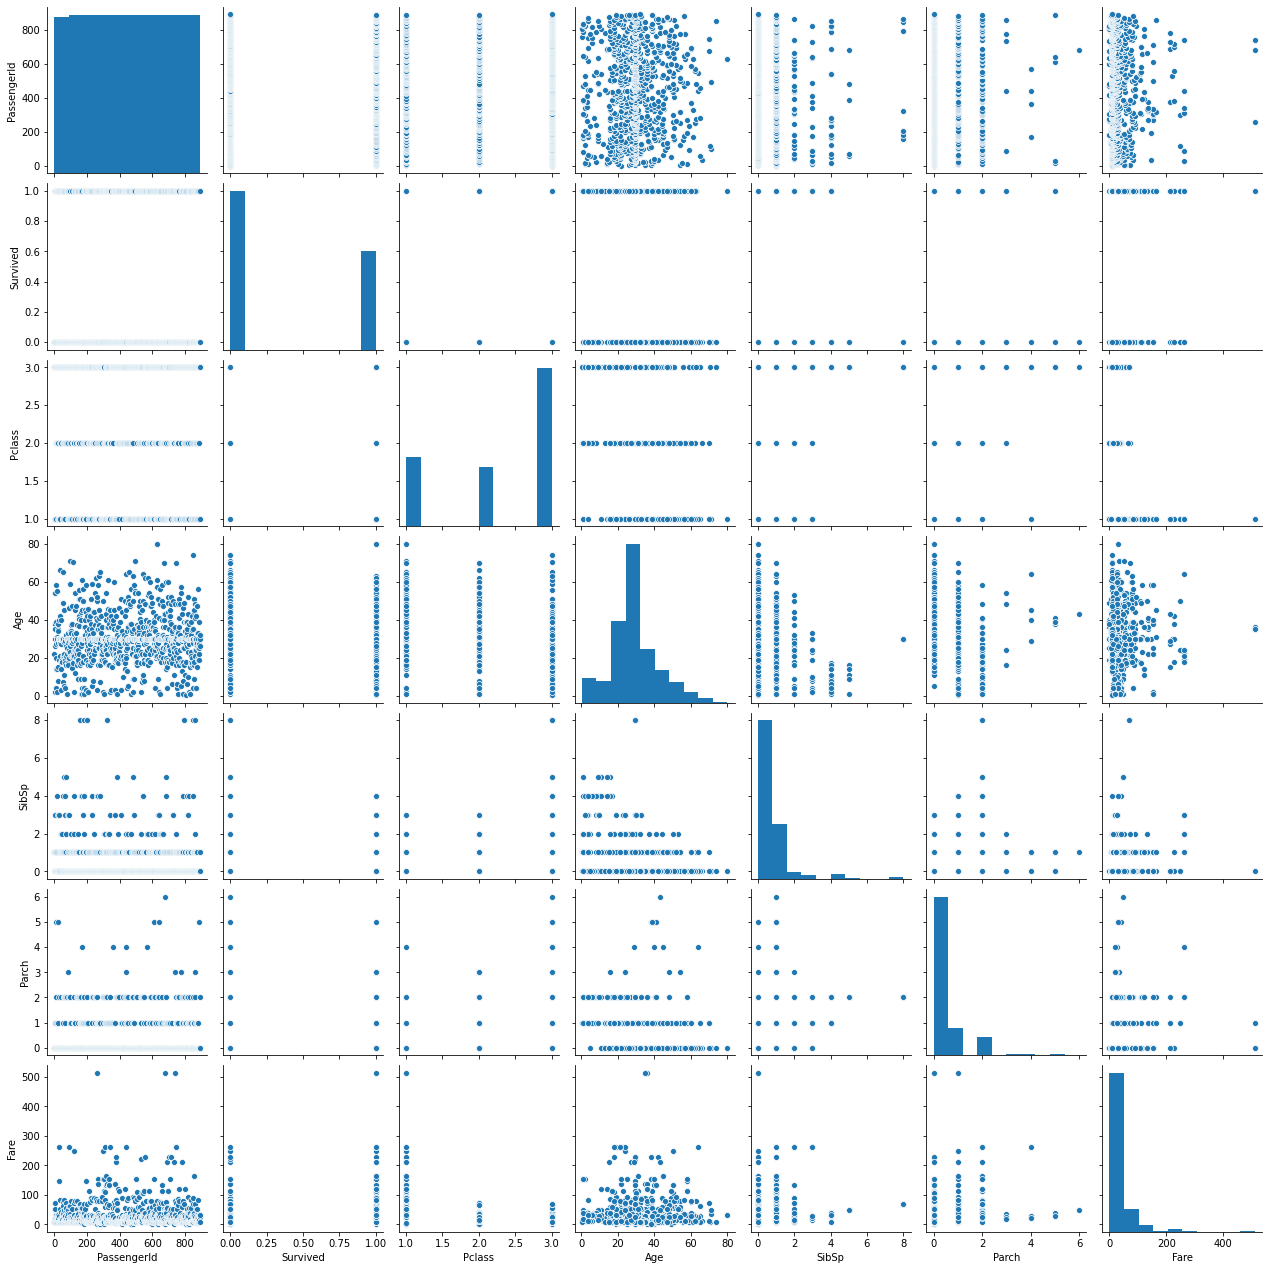

In [0]:
sns.pairplot(df)
plt.show()

#### Correlations
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. It ranges from -1 to 1.

References:

https://www.surveysystem.com/correlation.htm

https://www.youtube.com/watch?v=lVOzlHx_15s

In [0]:
#correlations
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030335,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074513,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.328256,0.081656,0.016824,-0.548193
Age,0.030335,-0.074513,-0.328256,1.000000,-0.231908,-0.178013,0.088780
SibSp,-0.057686,-0.034040,0.081656,-0.231908,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178013,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088780,0.160887,0.217532,1.000000


**Correaltions observed in Titanic:**

1. Pclass and Fare
2. Age and Parch
3. Age and SibSp
4. Age and Pclass
5. Pclass and Survived

**Correlation vs. Causation**

**Correlation** is a statistical measure that describes the size and direction of a relationship between two or more variables. A correlation between variables, however, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable.


**Causation** indicates that one event is the result of the occurrence of the other event; i.e. there is a causal relationship between the two events. This is also referred to as cause and effect. 


Theoretically, the difference between the two types of relationships are easy to identify — an action or occurrence can cause another (e.g. smoking causes an increase in the risk of developing lung cancer), or it can correlate with another (e.g. smoking is correlated with alcoholism, but it does not cause alcoholism). In practice, however, it remains difficult to clearly establish cause and effect, compared with establishing correlation.

Reference - https://www.abs.gov.au/websitedbs/a3121120.nsf/home/statistical+language+-+correlation+and+causation

**Spurious Correlations**

You can find fun examples of spurious correlations (high correlation but no causation) at https://www.tylervigen.com/spurious-correlations

#### Feature Engineering

The process of creating custom features (/columns) on a dataset based on one or more other columns is called feature engineering.

**How many relatives did the passenger have on board?**

In [0]:
#There are 2 columns for SibSp, Parch. Combine them for total number of relatives on board
df['RelativeCount'] = df['SibSp'] + df['Parch']
df['RelativeCount'].describe()

count    889.000000
mean       0.906637
std        1.614703
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: RelativeCount, dtype: float64

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativeCount,TravelAlone,AgeBucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,1,No,15-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,No,30-45
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,0,Yes,15-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,No,30-45
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,0,Yes,30-45


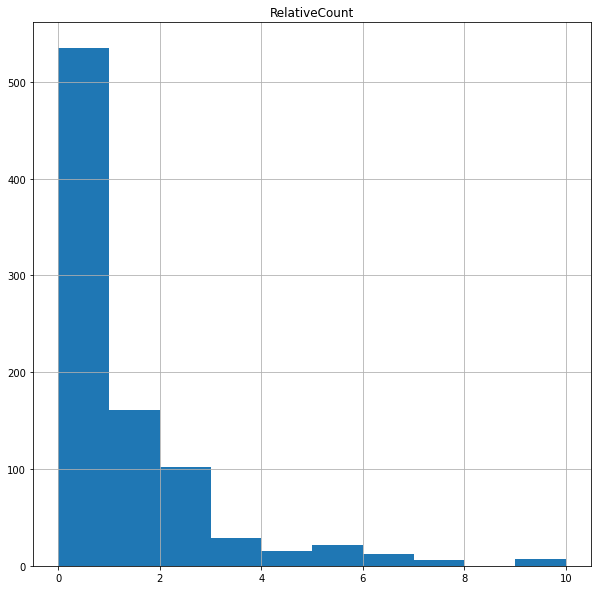

In [0]:
#Lets get a visual distribution too!
#Since its numerical, we pick a historgram for this
hist = df.hist(figsize=(10,10),column='RelativeCount')

**Was a passenger travelling alone?**

numpy.where(): Return elements chosen from x or y depending on condition.
https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

In [0]:
#Travel alone or not
df['TravelAlone'] = np.where(df['SibSp']+df['Parch']>0, "No", "Yes")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativeCount,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,1,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,0,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,0,Yes


In [0]:
df['TravelAlone'].value_counts()

Yes    535
No     354
Name: TravelAlone, dtype: int64

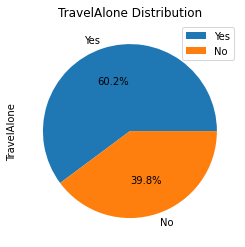

In [0]:
#Lets get a visual distribution too!
#Since its categorical, we pick a pie chart
pie = df['TravelAlone'].value_counts().plot(kind="pie",title='TravelAlone Distribution',legend=True,autopct='%1.1f%%')

**Bucketing the Age**

If there are too many numerical values in a column, its common to bucket these numerical values into smaller groups. This converts a numerical dataset into categorical.

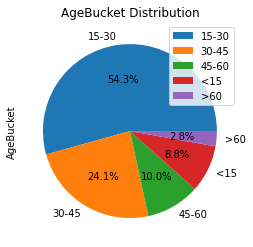

In [0]:
#Since its too much data to visualize and understand, lets bucket the age as below
#feature engineering FTW!
def bucket_age(age):
  if age < 15:
    return "<15"
  if age >= 15 and age < 30:
    return "15-30"
  if age >=30 and age < 45:
    return "30-45"
  if age>=45 and age < 60:
    return "45-60"
  return ">60"

df['AgeBucket'] = df['Age'].apply(bucket_age)

#Visualize this with a pie chart
pie = df['AgeBucket'].value_counts().plot(kind="pie",title='AgeBucket Distribution',legend=True,autopct='%1.1f%%')

#### Visualization

Visualizing your data is the easiest way to further understand your data and formulate hypothesis. This section is questions followed by how to visualize the data to answer these questions.

##### Data Distribution


**How does the Pclass relate to the Survival rate?**

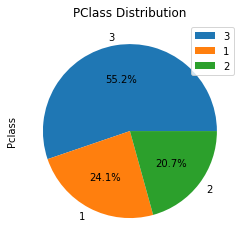

In [0]:
#Lets start off with a bar plot of the Pclass distribution
pie = df['Pclass'].value_counts().plot(kind="pie",title='PClass Distribution',legend=True,autopct='%1.1f%%')

In [0]:
df.groupby(['Pclass','Survived']).size().unstack()

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


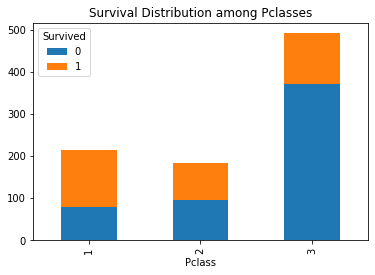

In [0]:
#What is the survival rate among these classes?
df.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar',stacked=True,title="Survival Distribution among Pclasses")
ax = plt.show()

**Does Pclass and Sex relate in any way?**

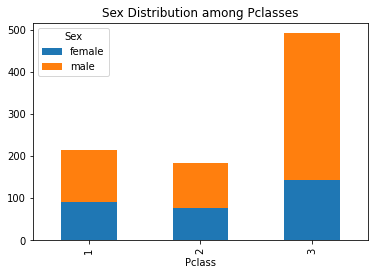

In [0]:
#What is the sex distribution among classes?
df.groupby(['Pclass','Sex']).size().unstack().plot(kind='bar',stacked=True,title="Sex Distribution among Pclasses")
plt.show()

##### Density Plots

A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable. It is a smoothed version of the histogram and is used in the same concept.

Kernel Density Estimation(KDE): Kernel density estimation is a really useful statistical tool with an intimidating name. Often shortened to KDE, it’s a technique that let’s you create a smooth curve given a set of data. Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis.

Reference - https://www.data-to-viz.com/graph/density.html

**Age and Survival Relationship**

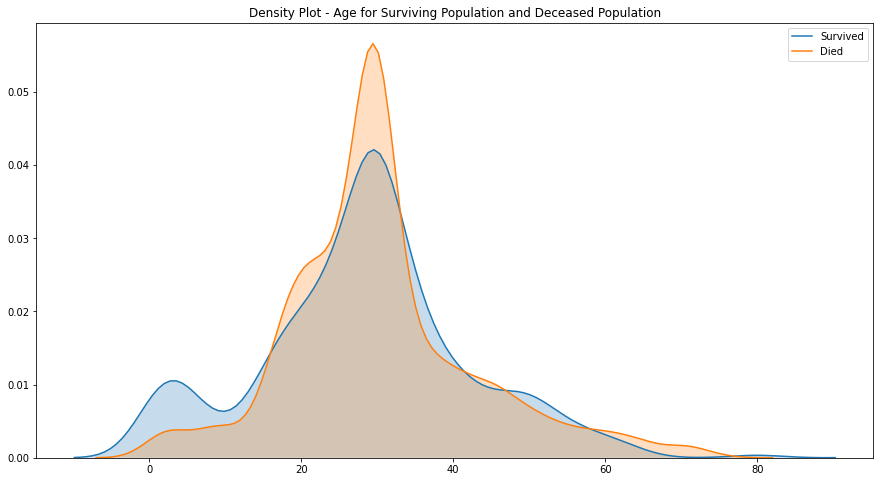

In [0]:
plt.figure(figsize=(15,8))
sns.kdeplot(df["Age"][df.Survived == 1], shade=True)
sns.kdeplot(df["Age"][df.Survived == 0], shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot - Age for Surviving Population and Deceased Population')
plt.show()

**Fare and Survival Relationship**

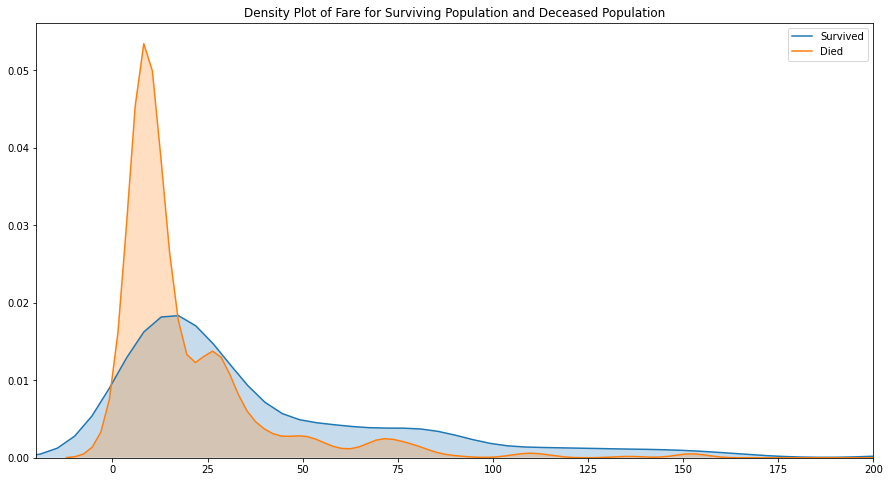

In [0]:
plt.figure(figsize=(15,8))
sns.kdeplot(df["Fare"][df.Survived == 1], shade=True)
sns.kdeplot(df["Fare"][df.Survived == 0], shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.show()

##### Box Plots

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

![alt text](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

Reference 
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review
- https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


**Sex and Fare Relationship**

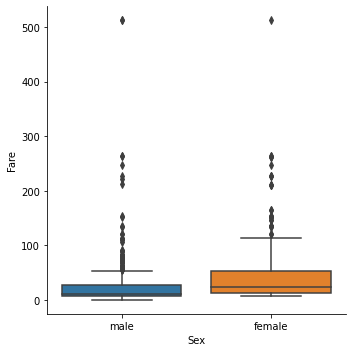

In [0]:
sns.catplot(x="Sex", y="Fare", kind="box", data=df)

**Pclass and Age Relationship**

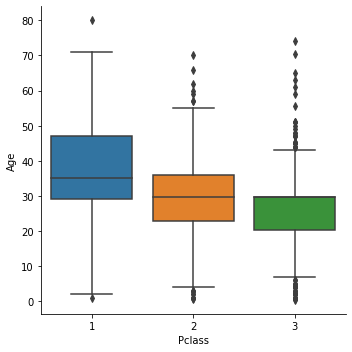

In [0]:
sns.catplot(x="Pclass", y="Age", kind="box", data=df)

**AgeBucket and Fare Relationship**

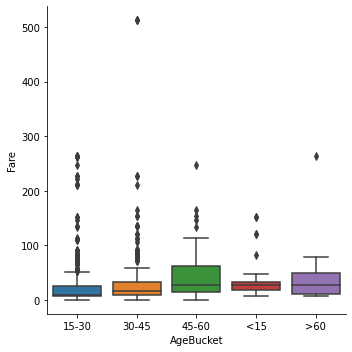

In [0]:
sns.catplot(x="AgeBucket", y="Fare", kind="box", data=df)

##### Line Graph

A line graph, also known as a line chart, is a type of chart used to visualize the value of something over time. For example, a finance department may plot the change in the amount of cash the company has on hand over time.

Since the Titanic dataset doesn't have time related data on it, let us pick another dataset for this visualization.

We are going to use the Boston Crimes dataset - https://www.kaggle.com/ankkur13/boston-crime-data

Use this dataset to conduct similar analysis to what we have done with the Titanic dataset!


In [0]:
!ls '/content/drive/My Drive/WWCode-Data Science/Mini Data Science Boot camp/data/crime_data'

crime.csv


In [0]:
crime_drive = '/content/drive/My Drive/WWCode-Data Science/Mini Data Science Boot camp/data/crime_data/crime.csv'

In [0]:
crime_df = pd.read_csv(crime_drive, engine='python')
crime_df.shape

(319073, 17)

In [0]:
crime_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [0]:
crime_df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

**Cumulative Yearly Crimes**

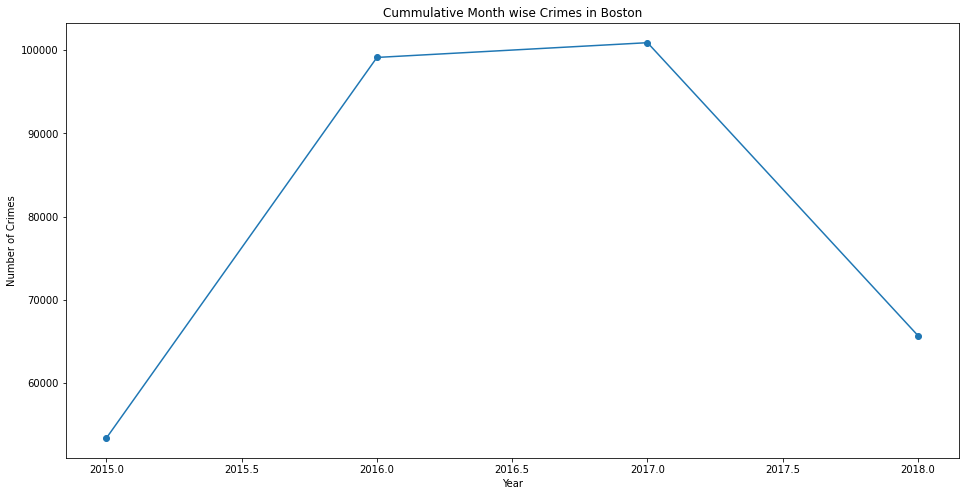

In [0]:
plt.figure(figsize=(16,8))
['INCIDENT_NUMBER'].count().plot(marker = 'o')
plt.xlabel('Year')crime_df.groupby(['YEAR'])
plt.ylabel('Number of Crimes')
plt.title('Cummulative Month wise Crimes in Boston')
plt.show()

**Cumulative Month Wise Crimes**

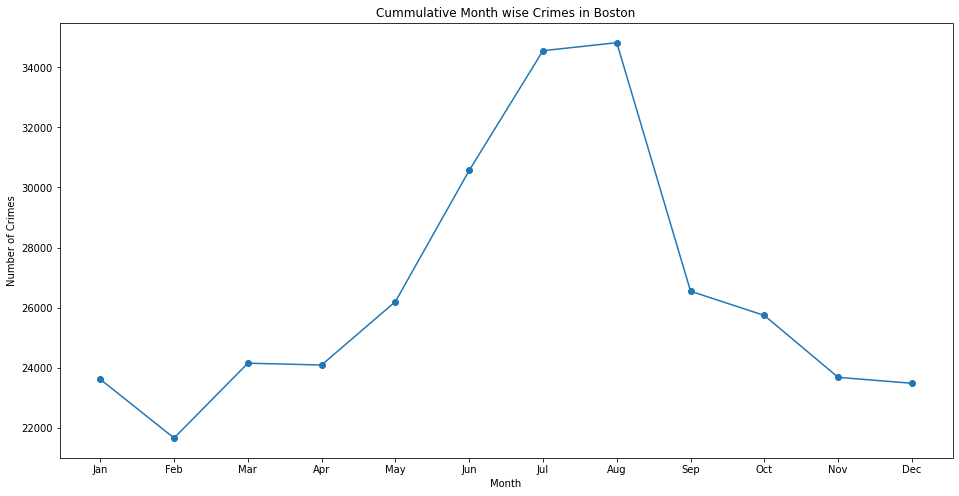

In [0]:
plt.figure(figsize=(16,8))
crime_df.groupby(['MONTH'])['INCIDENT_NUMBER'].count().plot(marker = 'o')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Cummulative Month wise Crimes in Boston')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

**Relationship between Month and Day of Week for Crime Occurence**

In [0]:
crime_df.groupby(['MONTH','DAY_OF_WEEK']).size()

MONTH  DAY_OF_WEEK
1      Friday         3695
       Monday         3511
       Saturday       3290
       Sunday         3044
       Thursday       3132
                      ... 
12     Saturday       3335
       Sunday         2915
       Thursday       3757
       Tuesday        3396
       Wednesday      3377
Length: 84, dtype: int64

In [0]:
crime_df.groupby(['MONTH','DAY_OF_WEEK']).size().unstack()

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
MONTH,,,,,,,
1,3695,3511,3290,3044,3132,3569,3369
2,3235,3303,3080,2592,3121,3139,3183
3,3899,3153,3280,2795,3976,3376,3667
4,3725,3445,3776,3392,3268,3154,3326
5,3603,3813,3261,3243,3775,4416,4088
6,4845,4340,4170,3479,4898,4353,4483
7,5144,5188,5015,4701,4778,4841,4889
8,4915,5253,4581,4253,5168,5177,5476
9,4482,3503,3940,3352,3862,3727,3677


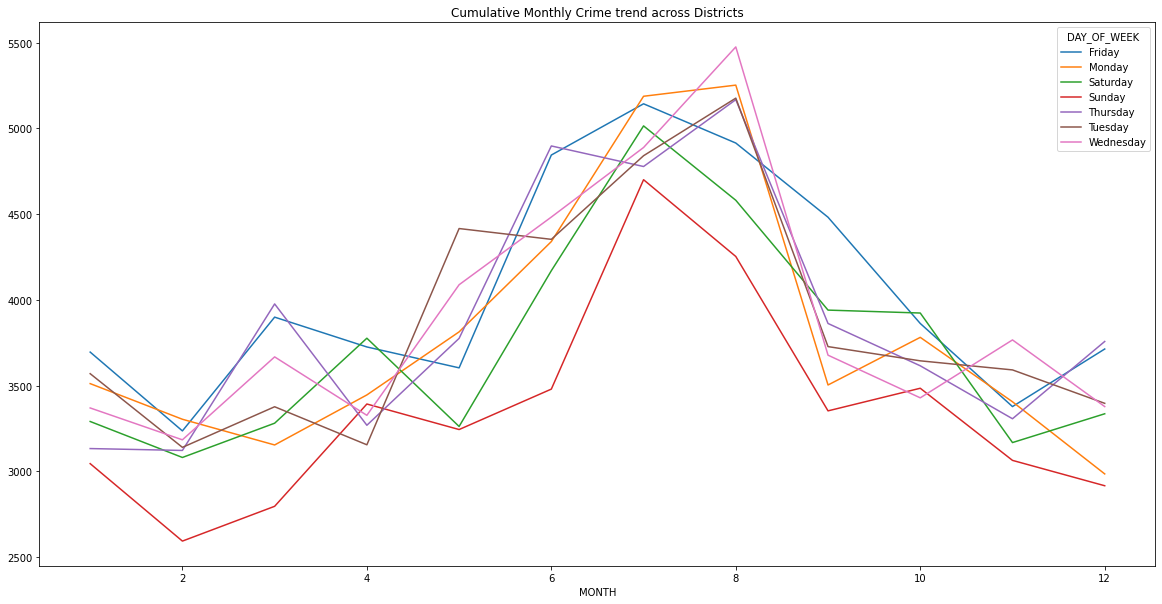

In [0]:
crime_line = crime_df.groupby(['MONTH','DAY_OF_WEEK']).size().unstack().plot(kind='line',title="Cumulative Monthly Crime trend across Districts",figsize=(20,10))

Your Turn!! 

https://github.com/WWCode-SV/Mini_Data_Science_Bootcamp  -> propertyDataAnalysis_NY.ipynb